# Portfolio Complex Systems Module 4 Attractor Dynamics

Name: Femian Dooms

Student number: 

Data: Timeseries data featuring power imbalance prices in the Netherlands. Obtained from Tennet transparency (publicaly available).
91 data points measured from 01-01-2024 up untill 01-04-2024. Every datapoint is the mean price at time i where i is measured in days.

In this module we analyse what type of attractor our dataset is. 






In [1]:
import csv
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Create df 
df = pd.read_csv('final_dataset.csv', delimiter=',')
df = df.groupby('Date')[['imbalance_price', 'wind_production', 'solar_production', 'gas_production']].mean().reset_index()


## Topological data analysis
A limit point is an attractor (static)
A limit cycle (limit set) is a periodic attractor

Topological data analysis (TDA) is a method for understanding the shape and structure of data. In the context of time series data, TDA can help identify persistent features such as loops, clusters, and other structures that might be indicative of the underlying dynamics. A pair of coupled difference equations allow for multiple topographical features and influence between variables:

Attractors: An attractor is a set of numerical values which a system tends to move towards when time progresses. Regardless of initial conditions.

Repellers: Opposite from attractors,  repeller is a set of points from which datapoints move away from as time progresses. 

Saddles: A saddle point is a point in the dataset that is stable in some directions (attracting) and unstable in others (repelling). Thus, saddles have both attracting and repelling characteristics.

Limit Cycles: A limit cycle is a closed trajectory in phase space indicating periodic motion. The system's state repeatedly follows this cycle, indicating stable, periodic behavior.

Combinations: In many systems, multiple topological features can coexist and interact, leading to complex dynamics. For instance, there could be presence of multiple stable states (attractors). 

### Analysing our data set
Steps we take to analyze the datapoints to predict what topology is most fitting for out data:

Change Score Calculation: We calculate the absolute difference between consecutive values as the change score.

Scatter Plot: We plot the relationship between change score and value.

Topological Features Prediction: We analyse the plots we created to see signs of what topological feature is has.

Regression Analysis: We perform a linear regression to see if there is a linear relationship between value and change score. Linear regression equation where value (Xt) predicts change in value (Xt+1 – Xt)
When B1 is negative, it indicates attraction
When B1 is positive, it indicates repulsion
Size of B1 is the strength of attraction/repulsion (Lyapunov Exponent)

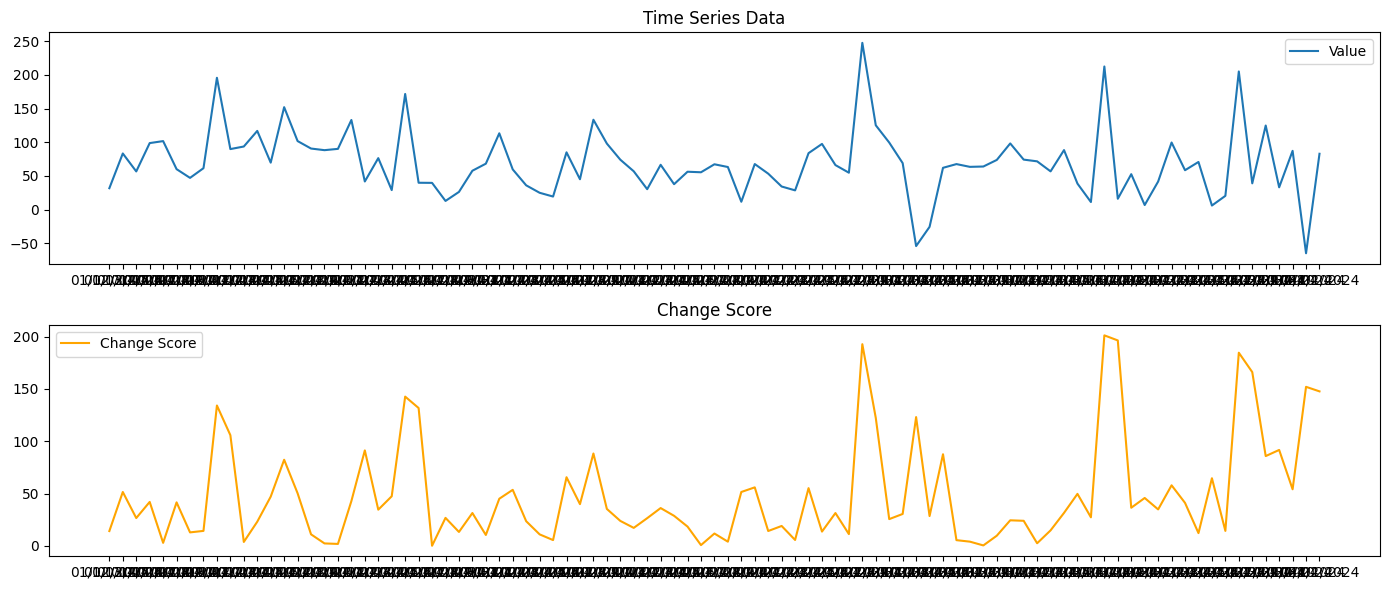

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42)
time = df['Date']
values = df['imbalance_price'].values

# Introduce regime changes
values[-30:40] += 2
values[-30:30] -= 2

# Create a DataFrame
data = pd.DataFrame({'time': time, 'value': values})

# Calculate change score as the absolute difference between consecutive values
data['change_score'] = data['value'].diff().abs()

# Drop the first row with NaN change score
data = data.dropna()

# Plot the time series and change score
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['value'], label='Value')
plt.title('Time Series Data')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['time'], data['change_score'], label='Change Score', color='orange')
plt.title('Change Score')
plt.legend()

plt.tight_layout()
plt.show()


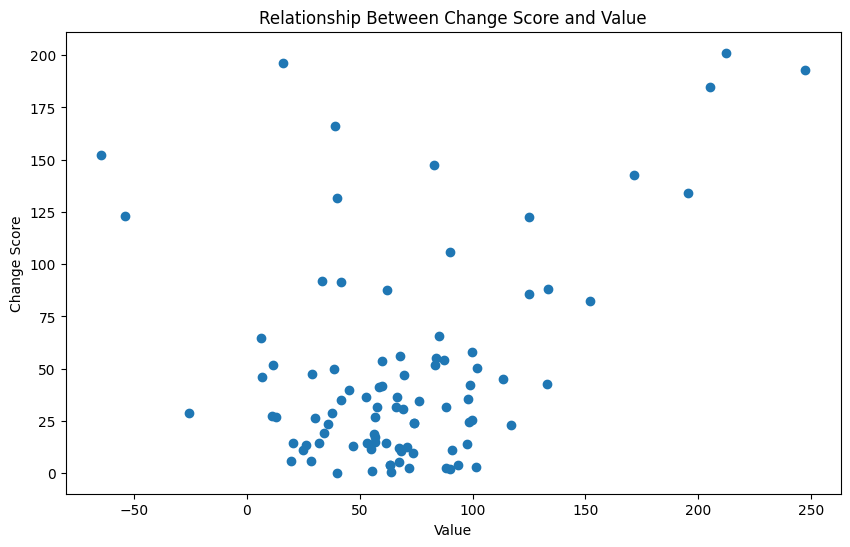

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data['value'], data['change_score'])
plt.title('Relationship Between Change Score and Value')
plt.xlabel('Value')
plt.ylabel('Change Score')
plt.show()


                            OLS Regression Results                            
Dep. Variable:           change_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     11.25
Date:                Sun, 02 Jun 2024   Prob (F-statistic):            0.00117
Time:                        20:13:52   Log-Likelihood:                -478.98
No. Observations:                  91   AIC:                             962.0
Df Residuals:                      89   BIC:                             967.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6076      8.473      3.022      0.0

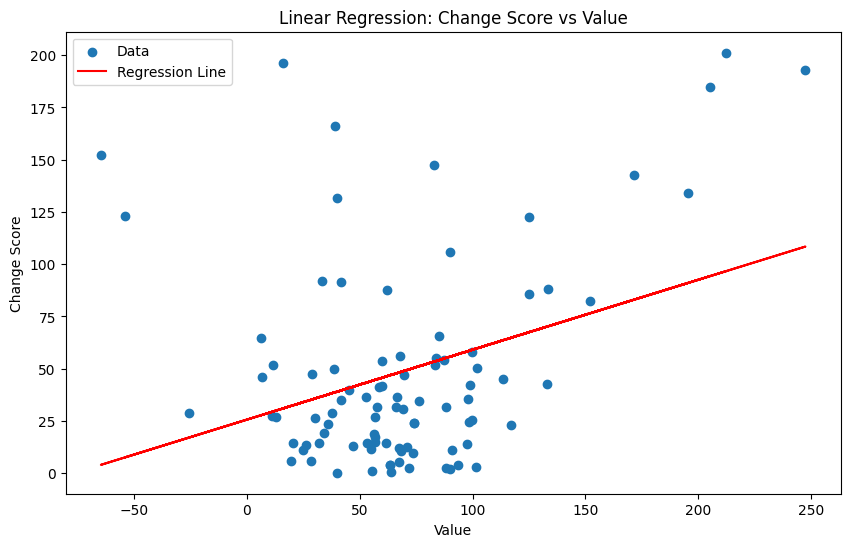

In [22]:
import statsmodels.api as sm

# Prepare the data for regression
X = data['value']
y = data['change_score']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['value'], data['change_score'], label='Data')
plt.plot(data['value'], model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression: Change Score vs Value')
plt.xlabel('Value')
plt.ylabel('Change Score')
plt.legend()
plt.show()


## Conclusion
First lets take a wider look at the plots.

Scatter Plot: We see no stability in the plot or any clusters. The values are quite scattered which can indicate a more chaotic nature. 

Regression Line: We can assume that there is no linear relationship in the scatterplot as it does not fit the regression line very well. Looking at the regression outcome we can verify that there is indeed nog significant relationship present.


## Topology 
We can see that B1 is positive (+) indicating repulsive reaction towards the datapoints. In addition, the size is relatively large (+) but not too steep. This means that there is not much repulsive strength in the data. With this we can claasify the topology as 'Repeller'. A repeller is a set of points in the phase space from which trajectories move away. These are the opposite of attractors. This is not too suprising as the datapoints behave more eratic as time progresses and thus create more distance.